In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/deepak/Documents/ML-Intern/Large_Cap/BAJFINANCE11.csv', index_col='Date',parse_dates=True)

In [3]:
## 5.1
daily_mean = df['Close Price'].pct_change().mean()
daily_std = df['Close Price'].pct_change().std() #daily volatility = underroot var ; std = square root of the Variance
annual_mean = daily_mean*252
annual_std = daily_std*np.sqrt(252)

In [4]:
df1 = pd.read_csv('/home/deepak/Documents/ML-Intern/Large_Cap/ASIANPAINT.csv')
df2 = pd.read_csv('/home/deepak/Documents/ML-Intern/Large_Cap/RELIANCE.csv')
df3 = pd.read_csv('/home/deepak/Documents/ML-Intern/Mid_Cap/PNB.csv' )
df4 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/PVR.csv')
df5 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/FORTIS.csv')

In [5]:
# # 20% from each
# n = 20
# df1 = df1[:int(len(df1)*(n/100))]
# df2 = df1[:int(len(df2)*(n/100))]
# df3 = df1[:int(len(df3)*(n/100))]
# df4 = df1[:int(len(df4)*(n/100))]
# df5 = df1[:int(len(df5)*(n/100))]


In [6]:
data = {'ASIANPAINT': df1['Close Price'], 'FORTIS': df5['Close Price'], 'PNB': df3['Close Price'], 
        'PVR': df4['Close Price'], 'RELIANCE': df2['Close Price']}
portfolio = pd.DataFrame(data).dropna()

In [7]:
equal_weights = np.full( portfolio.shape[1], 1/portfolio.shape[1] )
equal_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [8]:
portfolio_annual_return =  np.sum(portfolio.pct_change().mean() * equal_weights) * 252
print("portfolio_annual_mean :", round(portfolio_annual_return,2))

portfolio_annual_mean : -0.01


In [9]:
## covariance
portfolio_covarence = portfolio.pct_change().cov()
print(portfolio_covarence)


            ASIANPAINT    FORTIS       PNB       PVR  RELIANCE
ASIANPAINT    0.000174  0.000002  0.000048  0.000010  0.000063
FORTIS        0.000002  0.000705  0.000067  0.000044  0.000016
PNB           0.000048  0.000067  0.001180  0.000030  0.000070
PVR           0.000010  0.000044  0.000030  0.000382  0.000025
RELIANCE      0.000063  0.000016  0.000070  0.000025  0.000765


In [10]:
portfolio_annual_volatility = np.sqrt(np.dot(equal_weights.T,np.dot( portfolio.pct_change().cov(), equal_weights ) ) * np.sqrt(252))
# np.sqrt(np.dot(equal_weights.T,np.dot( portfolio.pct_change().cov(), equal_weights ) ) * np.sqrt(252))
print("portfolio_volatility :", round(portfolio_annual_volatility,2))

portfolio_volatility : 0.05


In [11]:
sharpe = portfolio_annual_return/portfolio_annual_volatility
print(round(sharpe,2))

-0.29


In [12]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

random_weights()

array([0.219, 0.325, 0.127, 0.023, 0.306])

In [13]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = np.sum(portfolio.pct_change().mean() * weights) * 252
    volatility = np.sqrt(np.dot(equal_weights.T,np.dot( portfolio.pct_change().cov(), weights ) ) * np.sqrt(252))
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{
        "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe
    }])

scatter_data.reset_index(inplace=True, drop=True)
scatter_data.head()

,weights,returns,volatility,sharpe
0,"[0.1071071071071071, 0.21321321321321318, 0.09...",0.018340,0.049450,0.370870
1,"[0.315, 0.209, 0.143, 0.22, 0.113]",0.003584,0.046505,0.077058
2,"[0.094, 0.041, 0.033, 0.373, 0.459]",0.080129,0.047875,1.673707
3,"[0.2197802197802198, 0.16083916083916086, 0.21...",-0.011005,0.051349,-0.214324
4,"[0.114, 0.153, 0.101, 0.26, 0.372]",0.029955,0.049732,0.602331


In [14]:
max_sharpe = scatter_data.loc[ scatter_data['sharpe'].idxmax()]
max_sharpe

weights       [0.381, 0.011, 0.006, 0.402, 0.2]
returns                               0.0982821
volatility                            0.0404534
sharpe                                  2.42951
Name: 2142, dtype: object

In [15]:
min_volatility = scatter_data.loc[ scatter_data['volatility'].idxmin()]
min_volatility

weights       [0.737, 0.202, 0.035, 0.022, 0.004]
returns                                 0.0412739
volatility                              0.0378103
sharpe                                    1.09161
Name: 2279, dtype: object

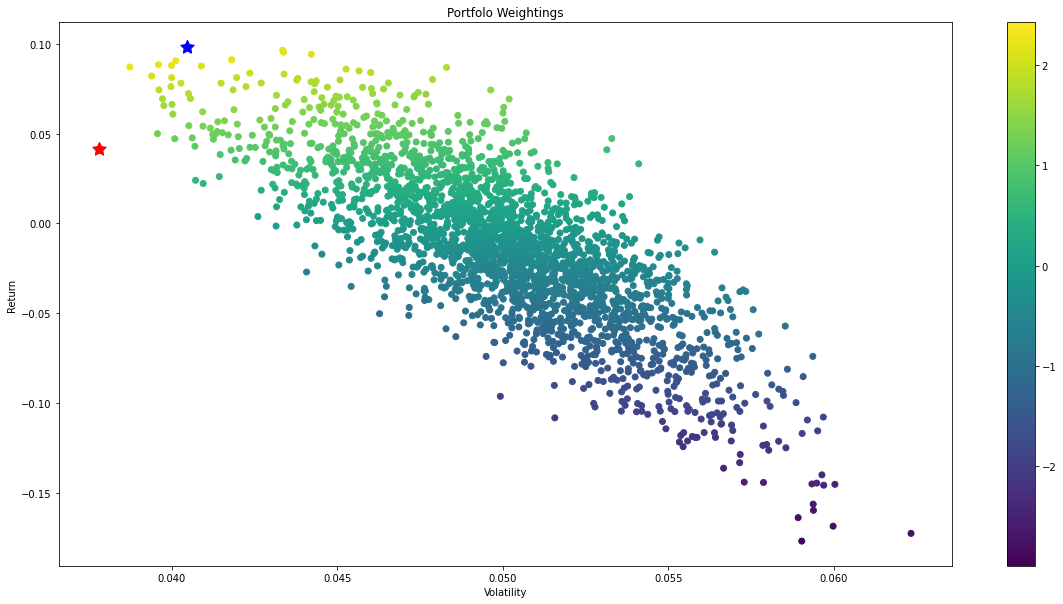

In [16]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    scatter_data.volatility,     
    scatter_data.returns, 
    c = scatter_data.sharpe
)
plt.title('Portfolo Weightings')
plt.ylabel('Return')
plt.xlabel('Volatility')
plt.colorbar()

# Mark the 2 portfolios
plt.scatter( max_sharpe.volatility,     max_sharpe.returns,     marker=(5,1,0), c='b', s=200 )
plt.scatter( min_volatility.volatility, min_volatility.returns, marker=(5,1,0), c='r', s=200 )